# Titanic Survival
### A Kaggle "hello-world" competition
Initiated: 10-05-2020

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from keras import optimizers
from keras import regularizers
from keras import layers
from sklearn.externals.six import StringIO  



from IPython.display import Image  
import pydotplus

Using TensorFlow backend.
C:\Users\R. Senthil Kumar\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
raw=pd.read_csv('D:\\Office Desk\\Rough work\\kaggle\\Titanic\\train.csv')
raw.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


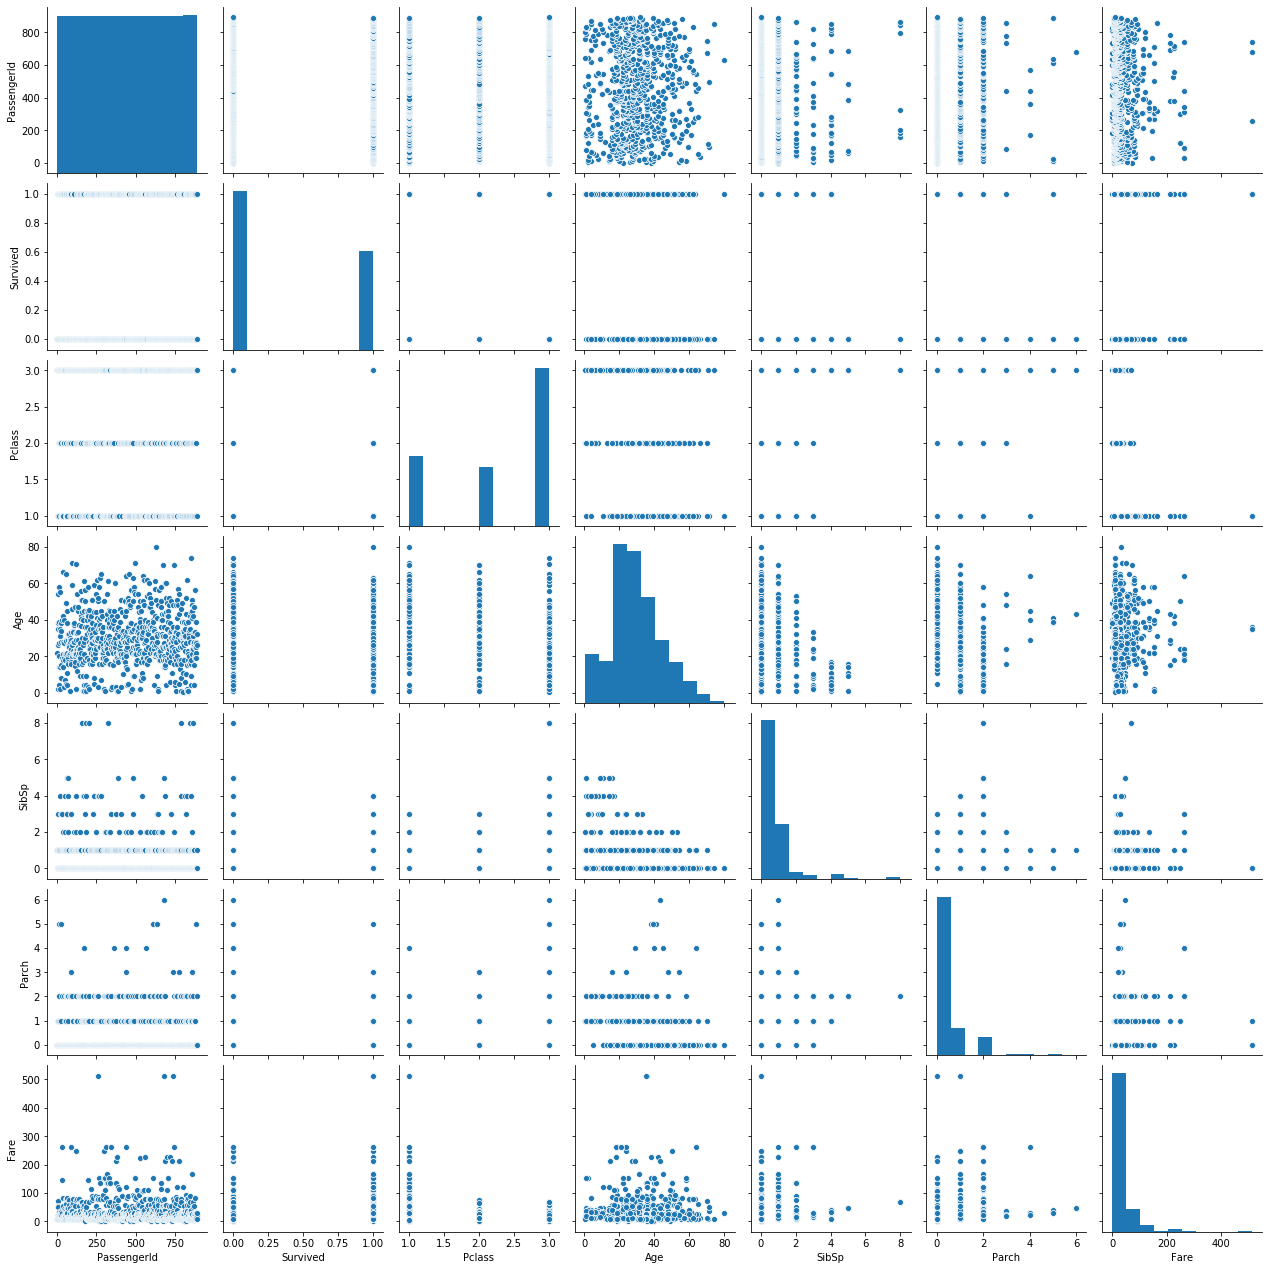

In [3]:
sb.pairplot(raw)

In [4]:
raw_test=pd.read_csv('D:\\Office Desk\\Rough work\\kaggle\\Titanic\\test.csv')
raw_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
df_raw=raw.loc[:,['Pclass','Sex','Age','SibSp','Parch','Survived','Fare','Survived']]
df_raw.head(10)
df_raw.shape

(891, 8)

In [6]:
raw_submit=pd.read_csv('D:\\Office Desk\\Rough work\\kaggle\\Titanic\\gender_submission.csv')
raw_submit.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# Preprocessing
1. Remove duplicates
2. Clean data
3. Normalise
4. Feature extraction
5. Train-Test split

In [7]:
df_raw=raw.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

gendict={}
i=0
for gen in df_raw['Sex'].unique():
    gendict[gen]=i
    i+=1
df_raw.replace({'Sex':gendict},inplace=True)
df_raw['Age'].isnull().sum()
male=[]
female=[]
o=[]
t=[]
h=[]
for gen in df_raw['Sex']:
    if gen==0:
        male.append(1)
        female.append(0)
    else:
        male.append(0)
        female.append(1)

for i in range(0,len(df_raw['Pclass'])):
    if df_raw['Pclass'][i]==1:
        o.append(1)
        t.append(0)
        h.append(0)
    if df_raw['Pclass'][i]==2:
        o.append(0)
        t.append(1)
        h.append(0)
    if df_raw['Pclass'][i]==3:
        o.append(0)
        t.append(0)
        h.append(1)
        
print(i)
df_raw.drop(columns=['Pclass','Sex'],inplace=True)
df_raw['o']=o
df_raw['t']=t
df_raw['h']=h

df_raw['male']=male
df_raw['female']=female


890


In [8]:
df_raw.head()

,Age,SibSp,Parch,Fare,Survived,o,t,h,male,female
0,22.0,1,0,7.2500,0,0,0,1,1,0
1,38.0,1,0,71.2833,1,1,0,0,0,1
2,26.0,0,0,7.9250,1,0,0,1,0,1
3,35.0,1,0,53.1000,1,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,0,1,1,0


In [93]:
minn=min(df_raw['Fare'])
maxx=max(df_raw['Fare'])

df_raw['Fare']=(df_raw['Fare']-min(df_raw['Fare']))/(max(df_raw['Fare'])-min(df_raw['Fare']))

dtree_train=df_raw.loc[:,['o','t','h','male','female','Fare','SibSp','Parch','Age','Survived']]
dtree_test=df_raw.loc[:,['o','t','h','male','female','Fare','SibSp','Parch','Age','Survived']]
for i in range(0,len(dtree_train)):
    if(df_raw['Age'].isnull()[i]):
        dtree_train=dtree_train.drop(i,axis=0)
    else:
        dtree_test=dtree_test.drop(i,axis=0)
        
dtree_train=dtree_train.reset_index(drop=True)
dtree_test=dtree_test.reset_index(drop=True)
print(dtree_train.shape,dtree_test.shape)

(714, 10) (177, 10)


In [94]:
from sklearn import linear_model
modelo=linear_model.LogisticRegression()
x=dtree_train.loc[:,['o','t','h','male','female','Fare']]
y=dtree_train['Age'].astype('uint8')
modelo.fit(x,y)

y_predicted=modelo.predict(x)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predicted)))

Mean Absolute Error: 144.2577030812325
Mean Squared Error: 70.73109243697479
Root Mean Squared Error: 8.410177907569778


In [11]:

xt=dtree_test.loc[:,['o','t','h','male','female','Fare']]
dtree_test.drop(columns=['Age'],inplace=True)
y=model.predict(xt)
dtree_test['Age']=y
df=pd.concat([dtree_train,dtree_test])

In [12]:
df.head()

,o,t,h,male,female,Fare,SibSp,Parch,Age,Survived
0,0,0,1,1,0,0.014151,1,0,22.0,0
1,1,0,0,0,1,0.139136,1,0,38.0,1
2,0,0,1,0,1,0.015469,0,0,26.0,1
3,1,0,0,0,1,0.103644,1,0,35.0,1
4,0,0,1,1,0,0.015713,0,0,35.0,0


In [120]:
minn=min(df['Age'])
maxx=max(df['Age'])

df['Age']=(df['Age']-minn)/(maxx-minn)

from sklearn.model_selection import train_test_split
xtensor=df.loc[:,['o','t','h','male','female','Fare','SibSp','Parch','Age']]
ytensor=df.loc[:,['Survived']]
x_train,x_test,y_train,y_test=train_test_split(xtensor,ytensor)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(668, 9) (223, 9) (668, 1) (223, 1)


# Decision Tree Model


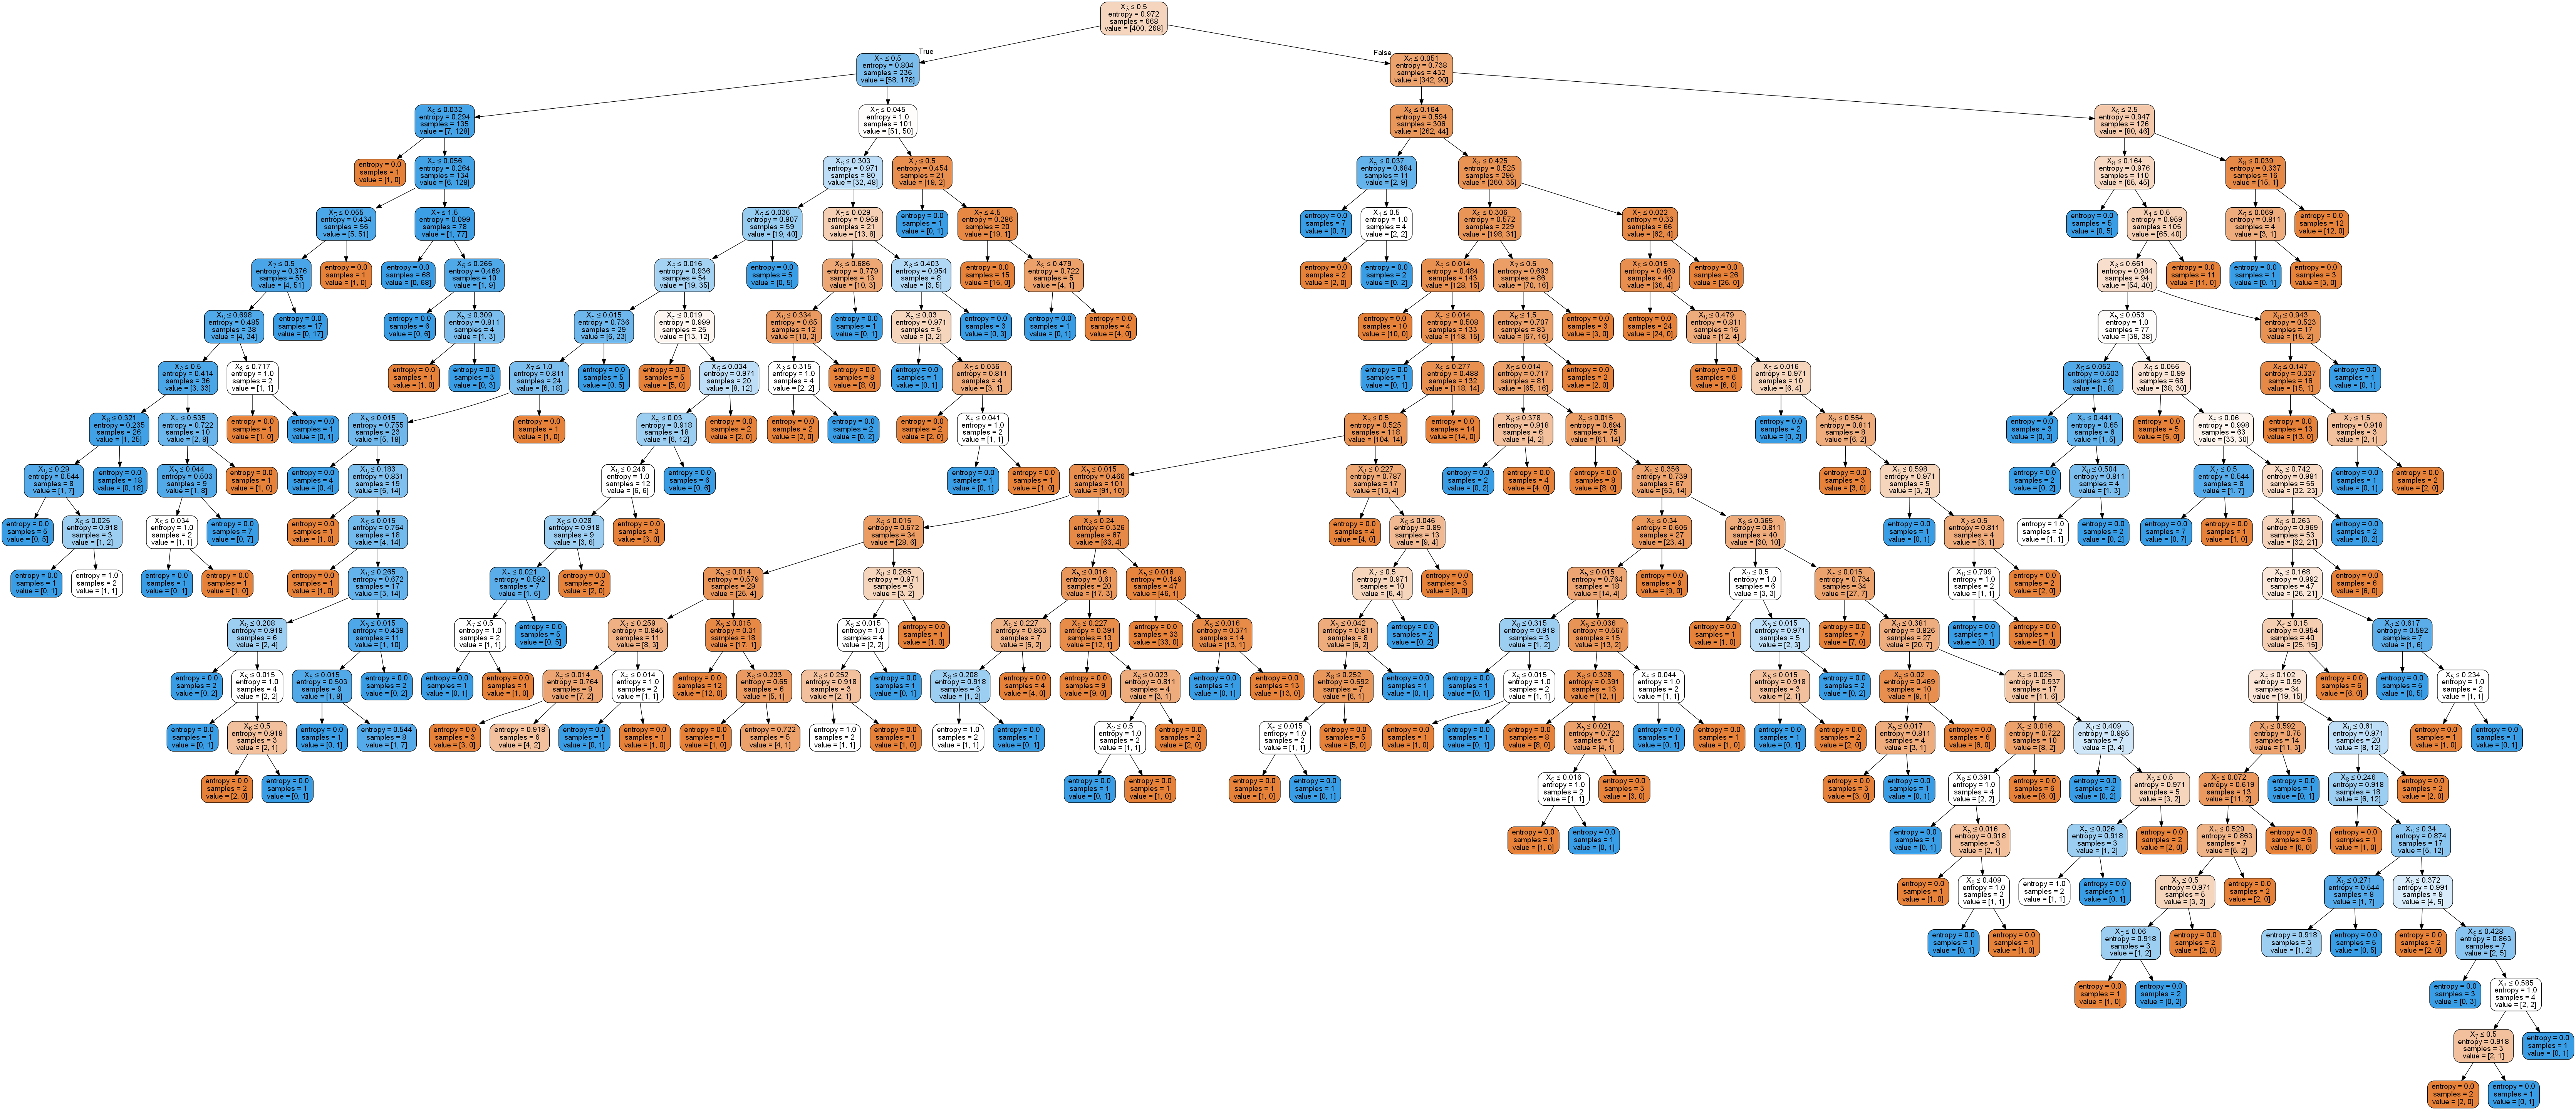

In [121]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy')
# tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
tree.fit(x_train, y_train)
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=800, height=300)

In [122]:
yans=tree.predict(x_test)
yans

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yans)

0.7982062780269058

# PREDICTION

In [124]:
raw_test=pd.read_csv('D:\\Office Desk\\Rough work\\kaggle\\Titanic\\test.csv')
raw_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [134]:
for i in range(0,len(raw_test['Fare'].isnull())):
    if raw_test['Fare'].isnull()[i]:
        raw_test['Fare'][i]=raw_test['Fare'].mean()

C:\Users\R. Senthil Kumar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
raw_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [135]:
maxx=max(raw['Fare'])
minn=min(raw['Fare'])

#raw_test.replace({'Sex':gendict},inplace=True)
for ii in range(0,len(raw_test)):
    if raw_test['Age'].isnull()[ii]:
        tensor=raw_test.loc[ii,['Pclass','Sex','SibSp','Parch','Fare']]
        tt=pd.DataFrame(tensor)
        tt=tt.T.loc[tt.T.index[0]:tt.T.index[0]+1,:]
        #print(tensor.shape)
        gen=tt['Sex'][tt.index[0]]
        if gen==0:
                male=1
                female=0
        else:
                male=0
                female=1
                

        
        if tt['Pclass'][tt.index[0]]==1:
                o=1
                t=0
                h=0
        if tt['Pclass'][tt.index[0]]==2:
                o=0
                t=1
                h=0
        if tt['Pclass'][tt.index[0]]==3:
                o=0
                t=0
                h=1

        
        tt.drop(columns=['Pclass','Sex'],inplace=True)
        tt['o']=[o]
        tt['t']=[t]
        tt['h']=[h]

        tt['male']=[male]
        tt['female']=[female]
        tt['Fare']=(tt['Fare']-minn)/(maxx-minn)
        #print((tt['Fare']-minn)/(maxx-minn))
        tt=tt.loc[:,['o','t','h','male','female','Fare']]
        print(tt)
        y=modelo.predict(tt)
        #print(tt)
        raw_test['Age'][ii]=y[0]
        
        '''
        tensor=tensor.loc[0,['o','t','h','male','female','Fare','SibSp','Parch','Age']]

        raw_test['Age'][ii]=modelo.predict(tensor)[0]'''

In [137]:
maxx=max(raw['Fare'])
minn=min(raw['Fare'])
ans=pd.DataFrame(columns=['PassengerId','Survived'])
minnn=min(df['Age'])
maxxx=max(df['Age'])

raw_test['Age']=(raw_test['Age']-minnn)/(maxxx-minnn)

p=[]
s=[]
for ii in range(0,len(raw_test)):
        tensor=raw_test.loc[ii,['Pclass','Sex','Age','SibSp','Parch','Fare']]
        tt=pd.DataFrame(tensor)
        tt=tt.T.loc[tt.T.index[0]:tt.T.index[0]+1,:]
        #print(tensor.shape)
        gen=tt['Sex'][tt.index[0]]
        if gen==0:
                male=1
                female=0
        else:
                male=0
                female=1
                

        
        if tt['Pclass'][tt.index[0]]==1:
                o=1
                t=0
                h=0
        if tt['Pclass'][tt.index[0]]==2:
                o=0
                t=1
                h=0
        if tt['Pclass'][tt.index[0]]==3:
                o=0
                t=0
                h=1

        
        tt.drop(columns=['Pclass','Sex'],inplace=True)
        tt['o']=[o]
        tt['t']=[t]
        tt['h']=[h]

        tt['male']=[male]
        tt['female']=[female]
        tt['Fare']=(tt['Fare']-minn)/(maxx-minn)
        #print((tt['Fare']-minn)/(maxx-minn))
        tt=tt.loc[:,['o','t','h','male','female','Fare','SibSp','Parch','Age']]
        #print(tt)
        y=tree.predict(tt)
        p.append(raw_test['PassengerId'][ii])
        s.append(y[0])
        #print(tt)
        

   o  t  h  male  female       Fare SibSp Parch   Age
0  0  0  1     1       0  0.0152816     0     0  34.5
   o  t  h  male  female       Fare SibSp Parch Age
1  0  0  1     0       1  0.0136631     1     0  47
   o  t  h  male  female       Fare SibSp Parch Age
2  0  1  0     1       0  0.0189087     0     0  62
   o  t  h  male  female       Fare SibSp Parch Age
3  0  0  1     1       0  0.0169081     0     0  27
   o  t  h  male  female       Fare SibSp Parch Age
4  0  0  1     0       1  0.0239836     1     1  22
   o  t  h  male  female      Fare SibSp Parch Age
5  0  0  1     1       0  0.018006     0     0  14
   o  t  h  male  female       Fare SibSp Parch Age
6  0  0  1     0       1  0.0148912     0     0  30
   o  t  h  male  female       Fare SibSp Parch Age
7  0  1  0     1       0  0.0566042     1     1  26
   o  t  h  male  female       Fare SibSp Parch Age
8  0  0  1     0       1  0.0141105     0     0  18
   o  t  h  male  female       Fare SibSp Parch Age
9  0  0  1

    o  t  h  male  female       Fare SibSp Parch Age
80  0  0  1     1       0  0.0297578     1     1   6
    o  t  h  male  female      Fare SibSp Parch Age
81  1  0  0     1       0  0.432884     1     0  67
    o  t  h  male  female       Fare SibSp Parch Age
82  1  0  0     1       0  0.0507486     0     0  49
    o  t  h  male  female       Fare SibSp Parch Age
83  0  0  1     1       0  0.0154116     0     0  20
    o  t  h  male  female       Fare SibSp Parch Age
84  0  1  0     1       0  0.0209012     0     0  34
    o  t  h  male  female       Fare SibSp Parch Age
85  0  0  1     1       0  0.0282127     1     0  21
    o  t  h  male  female       Fare SibSp Parch Age
86  0  0  1     0       1  0.0153792     0     0  27
    o  t  h  male  female       Fare SibSp Parch Age
87  0  0  1     0       1  0.0157126     0     0  18
    o  t  h  male  female      Fare SibSp Parch Age
88  0  0  1     0       1  0.015127     0     0  22
    o  t  h  male  female      Fare SibSp Parch Ag

     o  t  h  male  female       Fare SibSp Parch Age
164  0  1  0     1       0  0.0253743     0     0  41
     o  t  h  male  female       Fare SibSp Parch Age
165  0  0  1     0       1  0.0429899     1     1  26
     o  t  h  male  female       Fare SibSp Parch Age
166  1  0  0     1       0  0.0985612     0     0  48
     o  t  h  male  female       Fare SibSp Parch Age
167  0  0  1     1       0  0.0670955     2     2  18
     o  t  h  male  female       Fare SibSp Parch Age
168  1  0  0     0       1  0.0541074     0     0  24
     o  t  h  male  female       Fare SibSp Parch Age
169  0  0  1     0       1  0.0174936     0     0  22
     o  t  h  male  female       Fare SibSp Parch Age
170  0  0  1     1       0  0.0147366     0     0  20
     o  t  h  male  female       Fare SibSp Parch Age
171  0  0  1     1       0  0.0141023     0     0  27
     o  t  h  male  female      Fare SibSp Parch Age
172  0  0  1     1       0  0.027131     1     0  23
     o  t  h  male  female    

     o  t  h  male  female       Fare SibSp Parch Age
246  0  1  0     0       1  0.0409893     0     0  22
     o  t  h  male  female       Fare SibSp Parch Age
247  0  1  0     1       0  0.0634358     1     1  42
     o  t  h  male  female       Fare SibSp Parch Age
248  0  1  0     0       1  0.0507486     1     0  29
     o  t  h  male  female       Fare SibSp Parch Age
249  0  0  1     0       1  0.0282127     1     0  22
     o  t  h  male  female       Fare SibSp Parch   Age
250  0  1  0     0       1  0.0541644     1     2  0.92
     o  t  h  male  female       Fare SibSp Parch Age
251  0  0  1     1       0  0.0154686     0     0  20
     o  t  h  male  female      Fare SibSp Parch Age
252  1  0  0     1       0  0.266975     1     0  27
     o  t  h  male  female       Fare SibSp Parch Age
253  0  0  1     1       0  0.0182012     0     0  24
     o  t  h  male  female       Fare SibSp Parch   Age
254  0  0  1     1       0  0.0185428     0     0  32.5
     o  t  h  male  fe

322  0  1  0     1       0  0.0253743     0     0  26
     o  t  h  male  female       Fare SibSp Parch Age
323  1  0  0     1       0  0.0518221     0     0  33
     o  t  h  male  female      Fare SibSp Parch Age
324  1  0  0     0       1  0.412503     0     0  39
     o  t  h  male  female       Fare SibSp Parch Age
325  0  0  1     1       0  0.0137607     0     0  23
     o  t  h  male  female       Fare SibSp Parch Age
326  0  1  0     0       1  0.0761229     2     1  12
     o  t  h  male  female      Fare SibSp Parch Age
327  1  0  0     1       0  0.154588     0     0  46
     o  t  h  male  female       Fare SibSp Parch Age
328  0  1  0     1       0  0.0507486     1     0  29
     o  t  h  male  female       Fare SibSp Parch Age
329  0  1  0     1       0  0.0253743     0     0  21
     o  t  h  male  female       Fare SibSp Parch Age
330  0  1  0     0       1  0.0717312     0     2  48
     o  t  h  male  female       Fare SibSp Parch Age
331  1  0  0     1       0  0.05

     o  t  h  male  female       Fare SibSp Parch Age
399  0  0  1     1       0  0.0150944     0     0  31
     o  t  h  male  female      Fare SibSp Parch Age
400  1  0  0     0       1  0.321798     0     0  30
     o  t  h  male  female       Fare SibSp Parch Age
401  0  1  0     1       0  0.0409893     1     0  38
     o  t  h  male  female      Fare SibSp Parch Age
402  1  0  0     0       1  0.115941     0     1  22
     o  t  h  male  female       Fare SibSp Parch Age
403  1  0  0     1       0  0.0919331     0     0  17
     o  t  h  male  female       Fare SibSp Parch Age
404  1  0  0     1       0  0.0541074     1     0  43
     o  t  h  male  female       Fare SibSp Parch Age
405  0  1  0     1       0  0.0270578     0     0  20
     o  t  h  male  female       Fare SibSp Parch Age
406  0  1  0     1       0  0.0204946     1     0  23
     o  t  h  male  female      Fare SibSp Parch Age
407  1  0  0     1       0  0.412821     1     1  50
     o  t  h  male  female     Far

In [142]:
submit=pd.DataFrame(columns=['PassengerId','Survived'])
submit['Survived']=s
submit['PassengerId']=p

submit.to_csv("")
#Task completed

In [109]:
raw_test['Pclass']

0      3
1      3
2      2
3      3
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

In [101]:
minn

0.0